# Titanic - Análise Exploratória de Dados

Este notebook faz parte do projeto Titanic (competição do Kaggle), cujo objetivo é prever quem sobreviveu ao naufrágio, com base em informações como idade, sexo, classe, entre outros.

Aqui, faremos uma análise exploratória passo a passo para entender melhor os dados e gerar insights que ajudarão na modelagem futura.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style="whitegrid")


📝 Por que isso?
Usaremos pandas para manipular os dados, matplotlib e seaborn para visualizações. Essas ferramentas são padrão em ciência de dados.

In [2]:
df = pd.read_csv('../data/raw/train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


📝 O que estamos fazendo aqui?
Lemos o arquivo CSV com os dados de treinamento e mostramos as 5 primeiras linhas para termos uma noção geral da estrutura do dataset.

In [3]:
df.shape


(891, 12)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


📝 Explicação:

.shape mostra a quantidade de linhas e colunas

.info() revela os tipos de dados e onde existem valores nulos

In [5]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

📝 Por que isso é importante?
Valores ausentes precisam ser tratados antes de aplicar qualquer algoritmo de machine learning. Aqui, identificamos quais colunas possuem NaN.

In [6]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


📝 Objetivo:
Analisar estatísticas como média, desvio padrão, valores mínimos e máximos das colunas numéricas. Isso nos ajuda a entender a distribuição das variáveis.

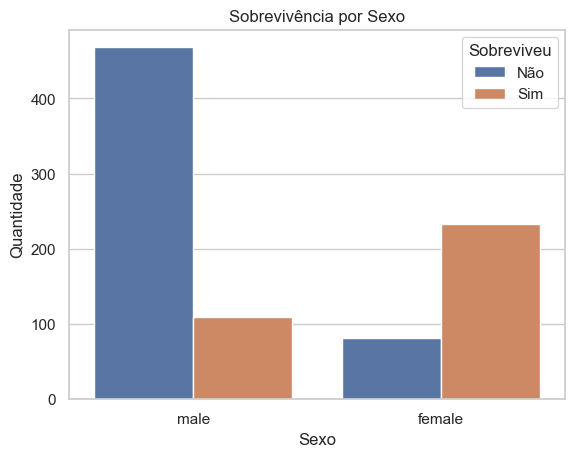

In [7]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()


✅ Mulheres têm maior taxa de sobrevivência que homens.

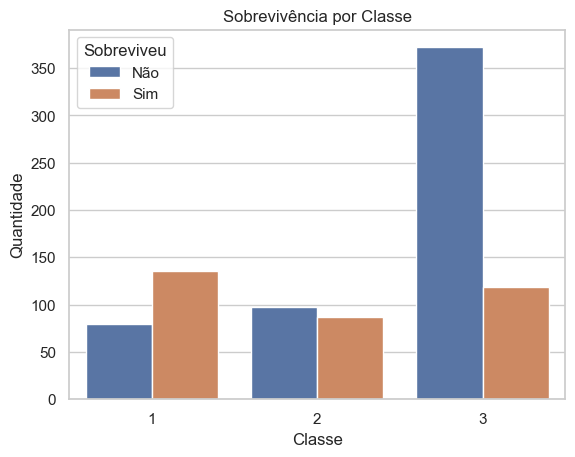

In [8]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()


✅ Passageiros da 1ª classe tiveram mais chances de sobreviver.

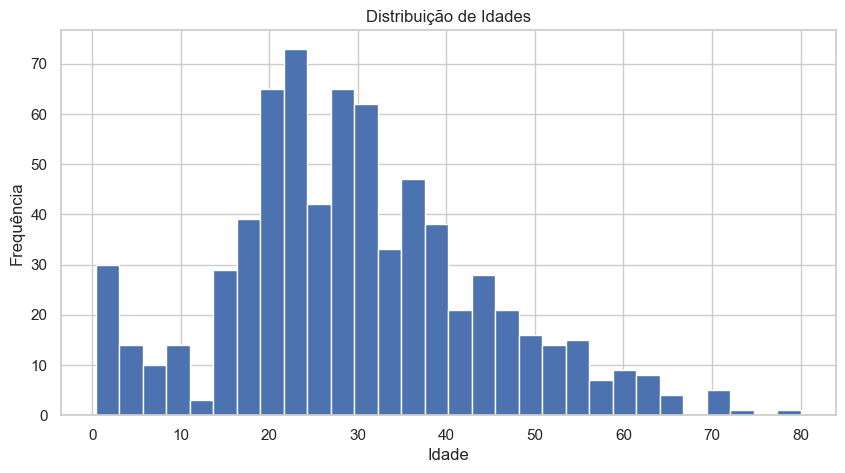

In [9]:
df['Age'].hist(bins=30, figsize=(10,5))
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


✅ A maioria dos passageiros tinha entre 20 e 40 anos.

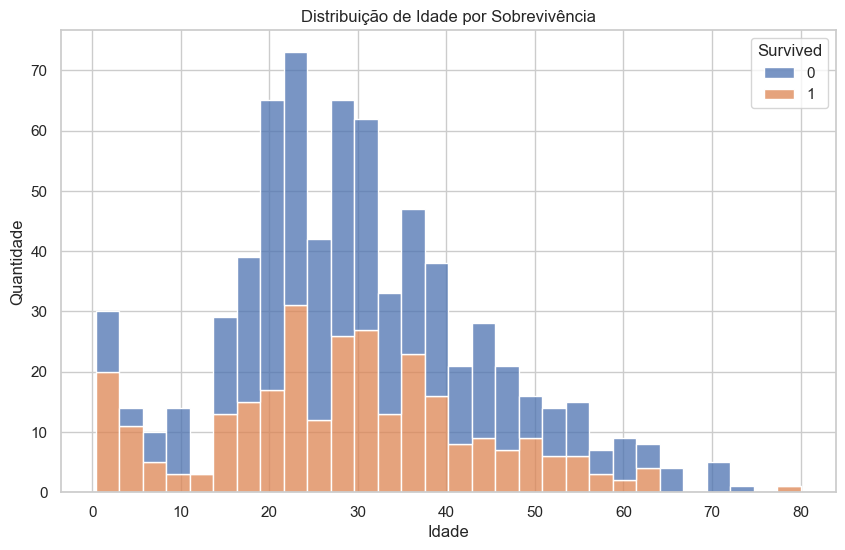

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=False, multiple="stack")
plt.title('Distribuição de Idade por Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()


✅ Crianças pequenas tiveram maior taxa de sobrevivência.

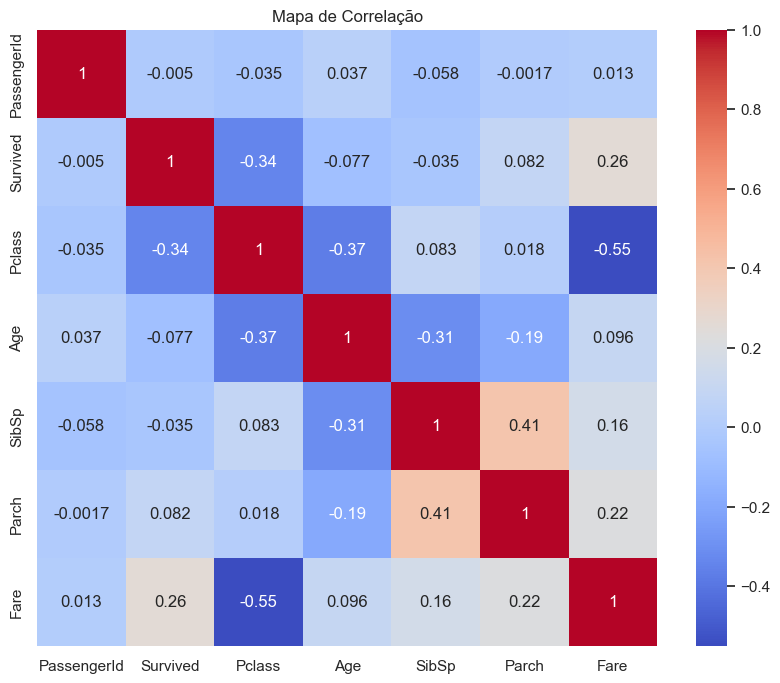

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
# Seleciona só colunas numéricas para calcular a correlação
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()


📝 Explicação:
df.select_dtypes(include='number') seleciona apenas as colunas numéricas do DataFrame manualmente.

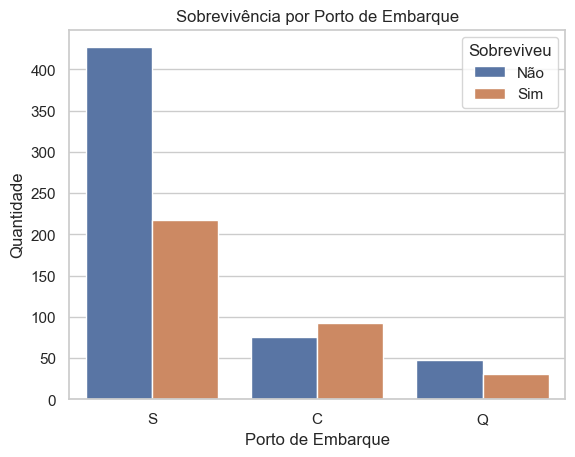

In [13]:
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Sobrevivência por Porto de Embarque')
plt.xlabel('Porto de Embarque')
plt.ylabel('Quantidade')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()


📝 Explicação:
Aqui observamos a quantidade de passageiros por porto (S, C, Q) e quantos sobreviveram em cada grupo. É importante porque pode indicar diferenças na taxa de sobrevivência ligada à localização ou classe social.

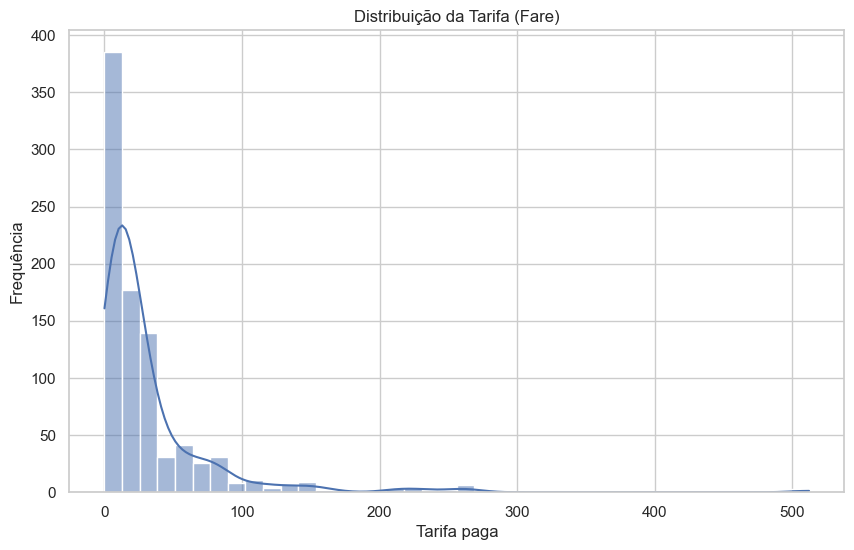

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Fare', bins=40, kde=True)
plt.title('Distribuição da Tarifa (Fare)')
plt.xlabel('Tarifa paga')
plt.ylabel('Frequência')
plt.show()


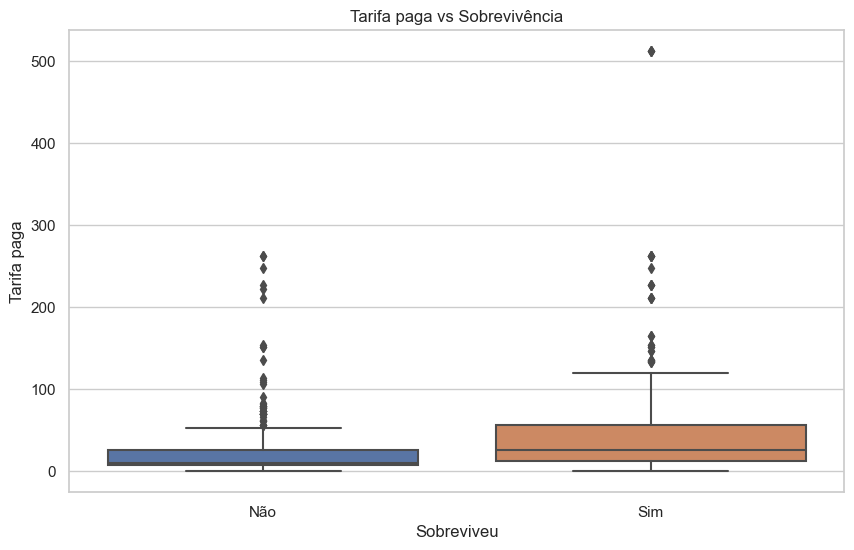

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Tarifa paga vs Sobrevivência')
plt.xlabel('Sobreviveu')
plt.ylabel('Tarifa paga')
plt.xticks([0,1], ['Não', 'Sim'])
plt.show()


📝 Explicação:
O boxplot mostra que quem pagou tarifas mais altas tinha maior chance de sobreviver, possivelmente porque pagavam por classes melhores.

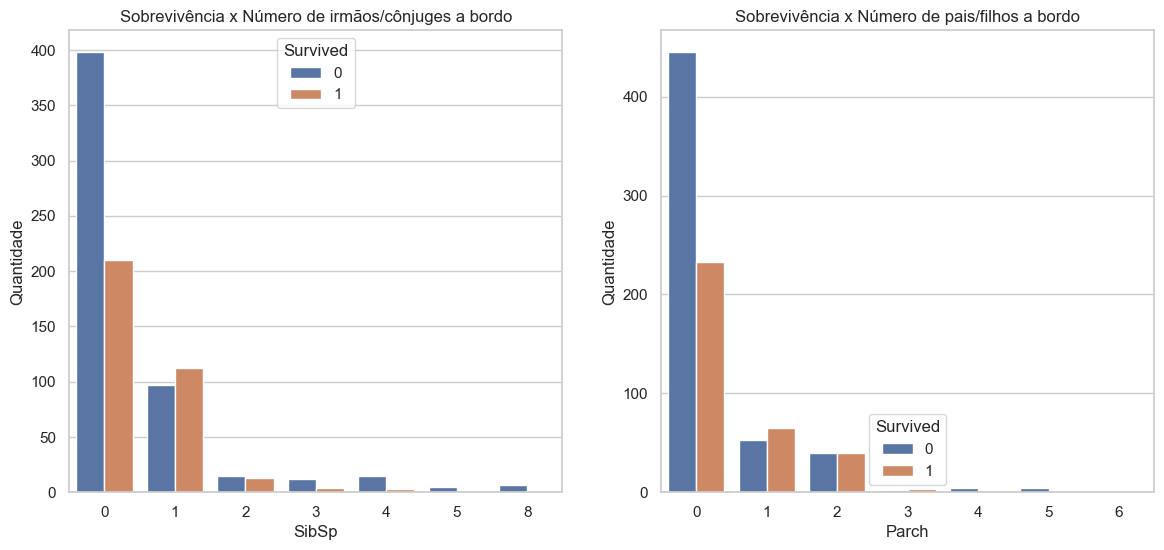

In [16]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

sns.countplot(data=df, x='SibSp', hue='Survived', ax=axes[0])
axes[0].set_title('Sobrevivência x Número de irmãos/cônjuges a bordo')
axes[0].set_xlabel('SibSp')
axes[0].set_ylabel('Quantidade')

sns.countplot(data=df, x='Parch', hue='Survived', ax=axes[1])
axes[1].set_title('Sobrevivência x Número de pais/filhos a bordo')
axes[1].set_xlabel('Parch')
axes[1].set_ylabel('Quantidade')

plt.show()


📝 Explicação:
Aqui observamos que passageiros com poucos familiares a bordo tiveram maiores chances de sobrevivência, possivelmente por maior mobilidade no resgate.

### Conclusões finais:

- Sexo, classe e idade são os fatores mais relevantes para sobrevivência.
- O porto de embarque e a tarifa paga também mostram influência significativa.
- Presença de familiares a bordo impacta, mas menos que as outras variáveis.
- Valores ausentes em `Age`, `Cabin` e `Embarked` precisam ser tratados no pré-processamento.

Próximo passo: aplicar o pré-processamento dos dados para deixar o dataset pronto para a modelagem.
